In [79]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

df1=pd.read_csv("D:/Python Ass_1/Updated Dataset/Dataset/chronic_kidney_disease_updated.csv") 

#print("Q1") displaying column name
print(df1[:0])

Empty DataFrame
Columns: [age, bp, sg, al, su, rbc, pc, pcc, ba, bgr, bu, sc, sod, pot, hemo, pcv, wbcc, rbcc, htn, dm, cad, appet, pe, ane, class]
Index: []

[0 rows x 25 columns]


In [80]:
#print("\n")
#print("Q2") first five rows in dataset
print(df1[0:5])

   age   bp     sg   al   su     rbc        pc         pcc          ba  bgr  \
0  NaN  NaN    NaN  NaN  NaN     NaN       NaN         NaN         NaN  NaN   
1   48   80  1.020    1    0       ?    normal  notpresent  notpresent  121   
2    7   50  1.020    4    0       ?    normal  notpresent  notpresent    ?   
3   62   80  1.010    2    3  normal    normal  notpresent  notpresent  423   
4   48   70  1.005    4    0  normal  abnormal     present  notpresent  117   

   ...   pcv  wbcc rbcc  htn   dm  cad appet   pe  ane class  
0  ...   NaN   NaN  NaN  NaN  NaN  NaN   NaN  NaN  NaN   NaN  
1  ...    44  7800  5.2  yes  yes   no  good   no   no   ckd  
2  ...    38  6000    ?   no   no   no  good   no   no   ckd  
3  ...    31  7500    ?   no  yes   no  poor   no  yes   ckd  
4  ...    32  6700  3.9  yes   no   no  poor  yes  yes   ckd  

[5 rows x 25 columns]


In [81]:
#print("\n")
#print("Q3") cleaning dataset
print(df1["dm"].unique())

[nan 'yes' 'no' ' yes' '\tno' '\tyes' '?']


In [82]:
#print("\n")
#print("Q4") rplacing with NaN
def function1(par):
    remove = lambda l: str(l).strip()
    par = par.applymap(remove)
    par = par.replace("?", np.nan)
    par = par.replace("nan", np.nan)
    par=par.replace(["\tno","\tyes"," ","?","\t","\t?"],float('nan'))
    return par
df1=function1(df1)
df1.dm.unique()
print(df1)


     age   bp     sg   al   su       rbc        pc         pcc          ba  \
0    NaN  NaN    NaN  NaN  NaN       NaN       NaN         NaN         NaN   
1     48   80  1.020    1    0       NaN    normal  notpresent  notpresent   
2      7   50  1.020    4    0       NaN    normal  notpresent  notpresent   
3     62   80  1.010    2    3    normal    normal  notpresent  notpresent   
4     48   70  1.005    4    0    normal  abnormal     present  notpresent   
5     51   80  1.010    2    0    normal    normal  notpresent  notpresent   
6     60   90  1.015    3    0       NaN       NaN  notpresent  notpresent   
7     68   70  1.010    0    0       NaN    normal  notpresent  notpresent   
8     24  NaN  1.015    2    4    normal  abnormal  notpresent  notpresent   
9     52  100  1.015    3    0    normal  abnormal     present  notpresent   
10    53   90  1.020    2    0  abnormal  abnormal     present  notpresent   
11    50   60  1.010    2    4       NaN  abnormal     present  

In [83]:
#print("\n")
#print("Q5") converting to datatype float
l = ['age','bp','bgr','bu','sc','sod','pot','hemo','pcv','wbcc','rbcc']
for x in l:
    df1[x] = df1[x].astype(float)
print(df1)

      age     bp     sg   al   su       rbc        pc         pcc          ba  \
0     NaN    NaN    NaN  NaN  NaN       NaN       NaN         NaN         NaN   
1    48.0   80.0  1.020    1    0       NaN    normal  notpresent  notpresent   
2     7.0   50.0  1.020    4    0       NaN    normal  notpresent  notpresent   
3    62.0   80.0  1.010    2    3    normal    normal  notpresent  notpresent   
4    48.0   70.0  1.005    4    0    normal  abnormal     present  notpresent   
5    51.0   80.0  1.010    2    0    normal    normal  notpresent  notpresent   
6    60.0   90.0  1.015    3    0       NaN       NaN  notpresent  notpresent   
7    68.0   70.0  1.010    0    0       NaN    normal  notpresent  notpresent   
8    24.0    NaN  1.015    2    4    normal  abnormal  notpresent  notpresent   
9    52.0  100.0  1.015    3    0    normal  abnormal     present  notpresent   
10   53.0   90.0  1.020    2    0  abnormal  abnormal     present  notpresent   
11   50.0   60.0  1.010    2

In [84]:
#print("\n")
#Q6 counting no of abnormal and abnormal rbc having ckd
abnormal = 0
normal = 0
for i in range(0,len(df1.rbc)):
    if df1["class"][i] == "ckd":
        if df1.rbc[i] == "abnormal":
            abnormal +=1
        elif df1.rbc[i] == "normal":
            normal +=1
print(abnormal)
print(normal)

47
60


In [85]:
#print("\n")
#Q7 find max blood preassue for patients having ckd
maxv = 0
for i in range(0,len(df1.bp)):
    if df1["class"][i] == "ckd":
        if df1.bp[i]> maxv:
            maxv = df1.bp[i]    
            
print(maxv)

180.0


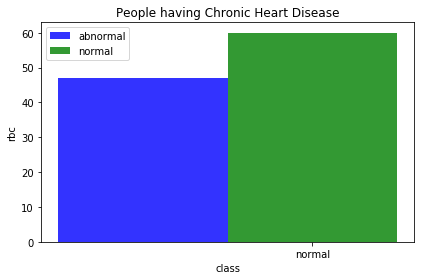

In [86]:
#print("\n")
#Q6 through plotting
n_groups = 1
abnormal_count = 0
normal_count = 0

fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8

for i in range(0,len(df1.rbc)):
    if df1["class"][i] == "ckd":
        if df1.rbc[i] == "abnormal":
            abnormal_count +=1 
        elif df1.rbc[i] == "normal":
            normal_count +=1

rects1 = plt.bar(index, abnormal_count, bar_width,
                 alpha=opacity,
                 color='b',
                 label='abnormal')

rects2 = plt.bar(index + bar_width, normal_count, bar_width,
                 alpha=opacity,
                 color='g',
                 label='normal')

plt.xlabel('class')
plt.ylabel('rbc')
plt.title('People having Chronic Heart Disease')
plt.xticks(index + bar_width, ('normal','abnormal'))
plt.legend()

plt.tight_layout()
plt.show()

In [88]:
#Q8 create csv name = clean_chronic_kidney_disease.csv
df1.to_csv("clean_ckd_dataset.csv",sep=',',index=False)